# Useful tools for Dynamical Systems analysis
Just some useful snippets of code for DS.

## 3D trajectory plotting
Simple function to plot 3D projections of trajectories

<IPython.core.display.Javascript object>


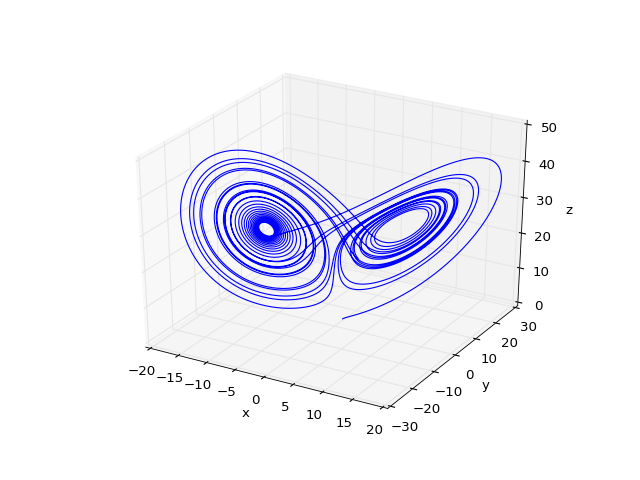

In [38]:
# 3D plot (Lorenz system example)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from __future__ import division
%matplotlib notebook

# Lorenz System
def Lorenz(X,a,b,c):
    dX = np.ndarray(X.shape)
    dX[0] = a*(X[1]-X[0])
    dX[1] = X[0]*(b-X[2])-X[1] 
    dX[2] = X[0]*X[1]-c*X[2]
    return dX

# Integrate Lorenz trajectory
dt = 0.001
t_max = 30
a,b,c = 10, 28, 8/3
X0 = np.array([1,1,1])
num_steps = int(t_max/dt)
Xtraj = np.zeros([num_steps,3],dtype=float)
Xtraj[0,:] = X0
F = lambda X: Lorenz(X,a,b,c)
for t in range(1,num_steps):
    Xtraj[t,:] = Xtraj[t-1,:]+dt*F(Xtraj[t-1,:])
    
# Plot trajectory
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(Xtraj[:,0], Xtraj[:,1],Xtraj[:,2], 'blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

## Vector field plots

<IPython.core.display.Javascript object>


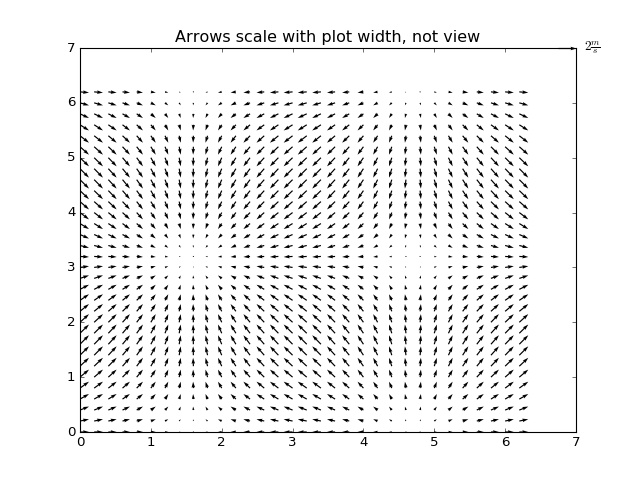

<IPython.core.display.Javascript object>


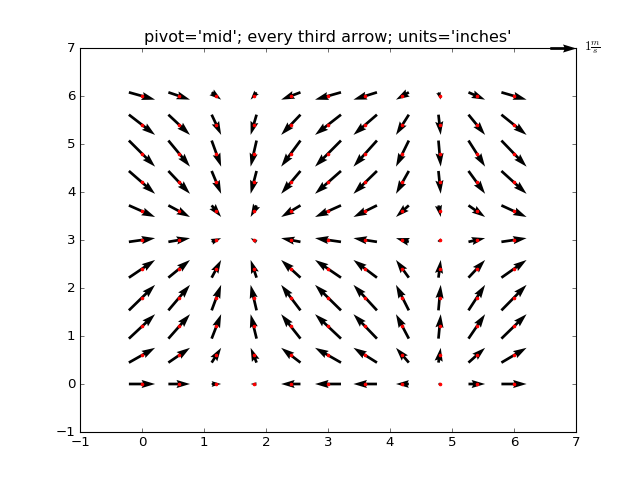

<IPython.core.display.Javascript object>


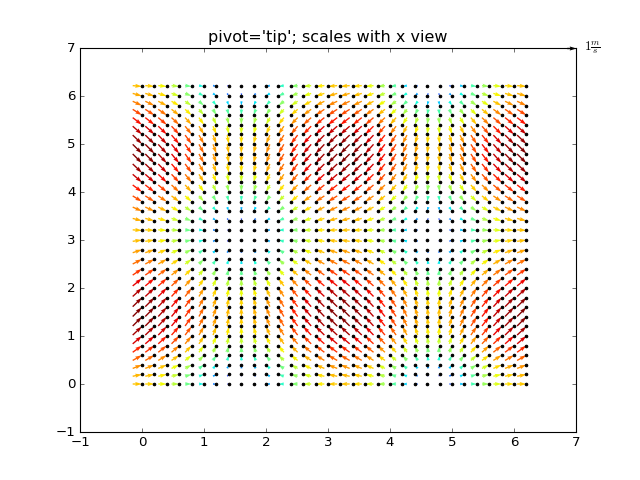

In [9]:
# Vector field plotting
# Adapted from : https://matplotlib.org/examples/pylab_examples/quiver_demo.html

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# from numpy import ma

X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)

plt.figure()
plt.title('Arrows scale with plot width, not view')
Q = plt.quiver(X, Y, U, V, units='width')
qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')

plt.figure()
plt.title("pivot='mid'; every third arrow; units='inches'")
Q = plt.quiver(X[::3, ::3], Y[::3, ::3], U[::3, ::3], V[::3, ::3],
               pivot='mid', units='inches')
qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.scatter(X[::3, ::3], Y[::3, ::3], color='r', s=5)

plt.figure()
plt.title("pivot='tip'; scales with x view")
M = np.hypot(U, V)
Q = plt.quiver(X, Y, U, V, M, units='x', pivot='tip', width=0.022,
               scale=1 / 0.15)
qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.scatter(X, Y, color='k', s=5)



## Cobweb plot

<IPython.core.display.Javascript object>


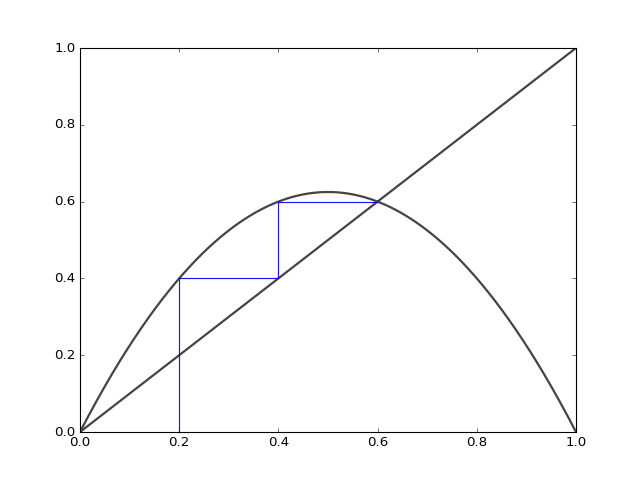

<IPython.core.display.Javascript object>


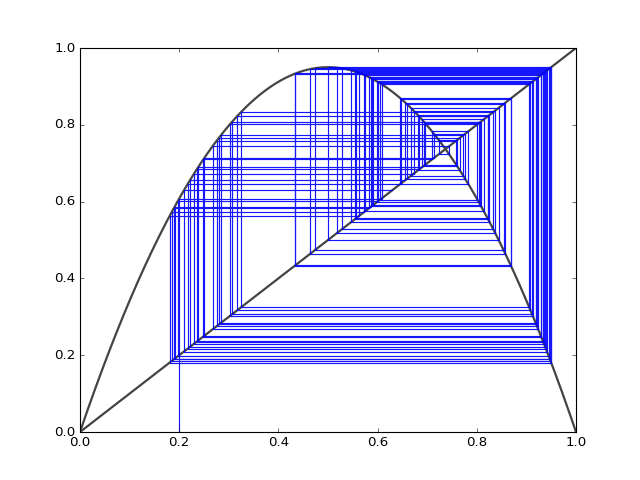

In [8]:
# Cobweb plot
# Adapted from : https://scipython.com/blog/cobweb-plots/

import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib notebook

def plot_cobweb(f, x0, nmax=40):
    """Make a cobweb plot.

    Plot y = f(x; r) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0.

    """
    x = np.linspace(0, 1, 500)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x), c='#444444', lw=2)
    ax.plot(x, x, c='#444444', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1])
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)

# example plots

r=2.5
func = lambda x : r*x*(1-x)
plot_cobweb(func, 0.2)

r=3.8
func = lambda x : r*x*(1-x)
plot_cobweb(func, 0.2, 200)